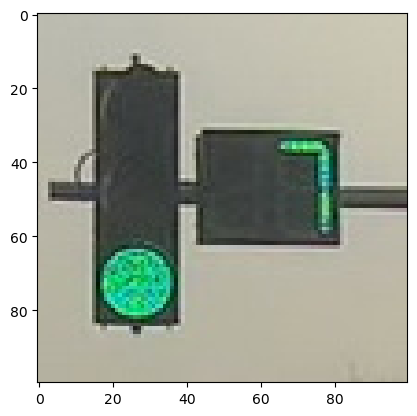

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

#img_bgr = cv.imread('D:/Projects/Pycharm_projects/CV/lab01/tlights/100_05.jpg')
#img_bgr = cv.imread('D:/Projects/Pycharm_projects/CV/lab01/tlights/100_09.jpg')
img_bgr = cv.imread('D:/Projects/Pycharm_projects/CV/lab01/tlights/100_10.jpg')
#img_bgr = cv.imread('D:/Projects/Pycharm_projects/CV/lab01/tlights/200_25.jpg')

img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)

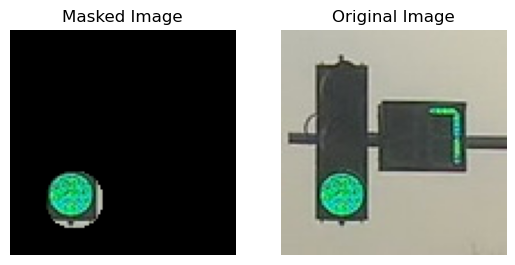

Text(0, 0.5, 'pixel count')

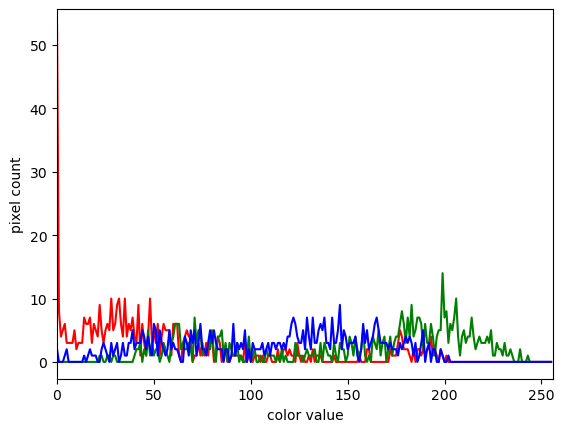

In [2]:
# Копирование исходного изображения
wellplate = np.copy(img_rgb)

mask = np.zeros(shape=wellplate.shape[0:2], dtype=bool)

# Создание круглой маски
#center = (85, 45)
center = (75, 28)
#center = (80, 20)
#center = (100, 150)
radius = 13
#radius = 20
circle = disk(center=center, radius=radius, shape=wellplate.shape[0:2])
mask[circle] = True 

# Копировать исходное изображение и использовать маску
masked_img = np.copy(wellplate)
masked_img[np.logical_not(mask)] = 0  # Сделайте область за маской черной

# # Создать диаграмму с двумя подпрограммами
fig, (ax1, ax2) = plt.subplots(1, 2)  

# Показать изображение после маски
ax1.imshow(masked_img)  
ax1.set_title("Masked Image")  
ax1.axis('off') 

# Показать исходное изображение
ax2.imshow(img_rgb)  
ax2.set_title("Original Image") 
ax2.axis('off')  

plt.show() 



# list to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for each color
plt.figure() 
plt.xlim([0, 256])  

# Все цвета в списке
for (channel_id, color) in enumerate(colors):
    # use your circular mask to apply the histogram
    # operation to the 7th well of the first row
    histogram, bin_edges = np.histogram(
        wellplate[:, :, channel_id][mask], bins=256, range=(0, 256)
    )  
    plt.plot(histogram, color=color)  

plt.xlabel("color value") 
plt.ylabel("pixel count") 


Text(0.5, 1.0, 'RGB')

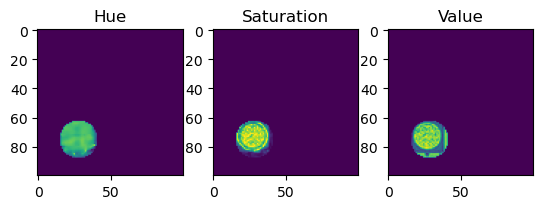

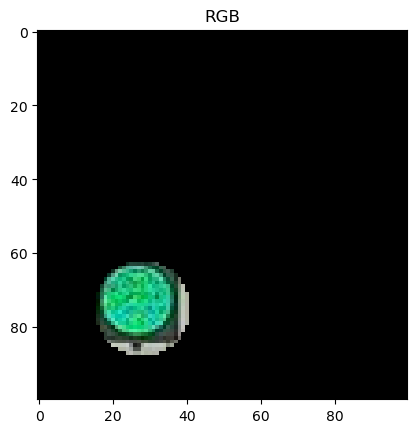

In [3]:
# Конвертировать изображения RGB в HSV
img_hsv = cv.cvtColor(masked_img, cv.COLOR_RGB2HSV)  # 将 RGB 图像转换为 HSV 图像

# Создать диаграмму с тремя подпрограммами
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)  # 创建一个包含三个子图的图形

# Показать HSV - изображение канала Hue
ax1.imshow(img_hsv[:,:,0])  
ax1.set_title("Hue") 

# Канал Saturation для отображения изображений HSV
ax2.imshow(img_hsv[:,:,1]) 
ax2.set_title("Saturation") 

# Канал Value для отображения изображений HSV
ax3.imshow(img_hsv[:,:,2]) 
ax3.set_title("Value")  

# Создать новую графику и показать оригинальное изображение RGB
plt.figure()  

plt.imshow(masked_img) 
plt.title("RGB")  


[79 76 72 83 66 70 43 35 55 51]


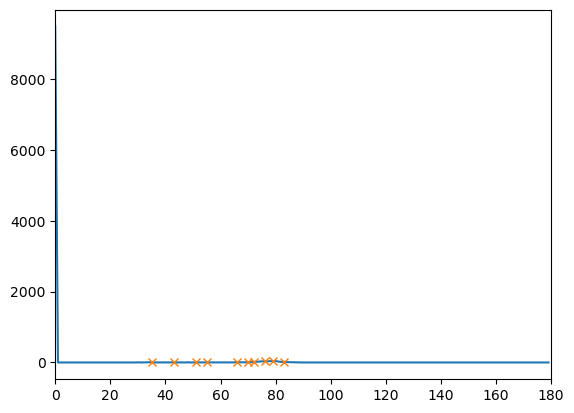

In [4]:
# Создать новое графическое окно
plt.figure()
# Диапазон осей X
plt.xlim([0,180])
# Гистограмма для вычисления канала Hue
histogram, bin_edges = np.histogram(
  img_hsv[:, :, 0], bins=180, range=(0, 180)
)
# Составление гистограммы
plt.plot(histogram)

# Импорт функции find peaks для определения локального максимума
from scipy.signal import find_peaks
# Обнаружение локального максимума
peaks, _ = find_peaks(histogram)
# Сортировка пиков
_, sorted_peaks = zip(*sorted(zip(histogram[peaks], peaks), reverse=True))
sorted_peaks = np.asarray(sorted_peaks[:10])

print(sorted_peaks)

# Пик маркировки
plt.plot(sorted_peaks,histogram[sorted_peaks],"x")